In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
# Import Dataset
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [5]:
# Normalize heterogenous numerical data
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [6]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [7]:
# within-cluster sum-of-squares criterion 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(crime2_norm)
clusters3

KMeans(n_clusters=3, random_state=30)

In [9]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 0])

In [10]:
# Assign clusters to the data set
crime3=crime2.copy()
crime3['clusters3id']=clusters3.labels_
crime3

,Murder,Assault,UrbanPop,Rape,clusters3id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [11]:
# Compute the centroids for K=3 clusters with 4 variables
clusters3.cluster_centers_

array([[0.04544868, 0.95210555, 0.27128802, 0.10877231],
       [0.02971377, 0.65577288, 0.73186384, 0.14305726],
       [0.03824062, 0.86500142, 0.47897132, 0.12490787]])

In [12]:
# Group data by Clusters (K=3)
crime3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.387500,243.750000,67.208333,27.287500
1,1,2.616667,54.833333,62.000000,12.333333
2,2,5.020000,117.950000,64.600000,16.635000


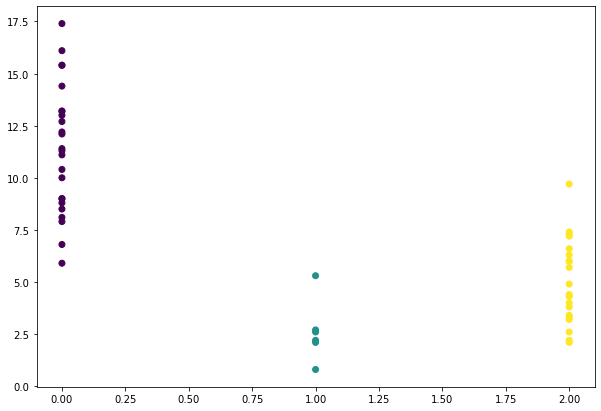

In [13]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clusters3id'],crime3['Murder'], c=clusters3.labels_) 